In [1]:
import json
from matplotlib import pyplot as plt
# 데이터 로드
with open(r"C:\Users\bluecom001\Downloads\수정_202301월자료_weatherData1.json", 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data))


{"j": ["\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\uc11c\uc6b8", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\ubd80\uc0b0", "\uc81c\uc8fc", "\uc81c\uc8fc", "

In [2]:
json_data.keys()

dict_keys(['j', 'd', 'max', 'min', 'rain'])

In [3]:
# 전체 요소 확인
total_list = [total for total in json_data.values()]

In [4]:
header,local = total_list[0], total_list[1:]

In [5]:
label = [x for x in local[0]]
num = [x for x in local[3] if x != ""]

In [6]:
new_num = [float(x) for x in num]

In [7]:
import numpy as np
sum_seoul = np.sum(new_num[:30], axis = 0)
sum_busan = np.sum(new_num[31:59], axis = 0)
sum_jeju = np.sum(new_num[60:], axis = 0)

Text(0.5, 1.0, '제주 강수량 합')

c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs

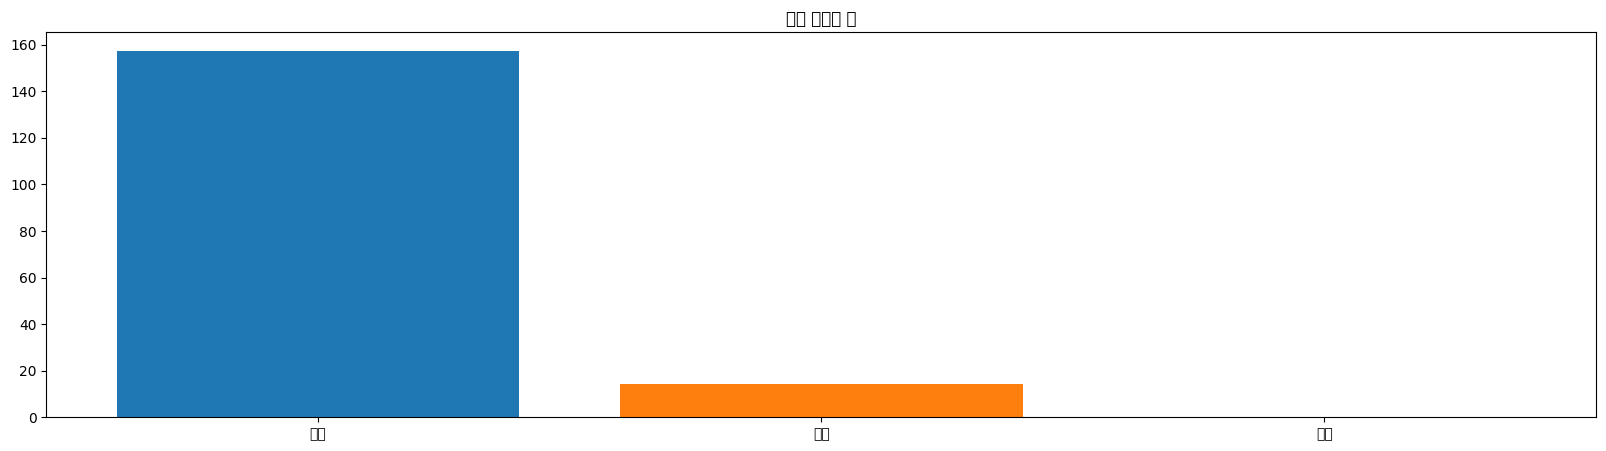

In [8]:
plt.figure(figsize=(20,5))
plt.bar(header[:30],sum_seoul)
plt.title("서울 강수량 합")

plt.bar(header[31:59],sum_busan)
plt.title("부산 강수량 합")

plt.bar(header[60:],sum_jeju)
plt.title("제주 강수량 합")

In [9]:
# 도시 - 날짜, 기온, 강수량 연결
totalList = []
for name, date, max, min, rain in zip (total_list[0], total_list[1], total_list[2], total_list[3], total_list[4]):
    totalList.append([name, date, max, min, rain])   

In [10]:
# 각 도시의 강수량 합

def total_rain_calculator(city_name):
    seoul_rain_list, busan_rain_list, jeju_rain_list = [], [], []
    
    for total in totalList:
        if total[0] == "서울" and total[4] != "":
            seoul_rain_list.append(float(total[4]))
            if city_name == "서울":
                return sum(seoul_rain_list)
        
        if total[0] == "부산" and total[4] != "":
            busan_rain_list.append(float(total[4]))
            if city_name == "부산":
                return sum(busan_rain_list)
        
        if total[0] == "제주" and total[4] != "":
            jeju_rain_list.append(float(total[4]))
            if city_name == "제주":
                return sum(jeju_rain_list)
            
total_rain_calculator("서울")

3.9

In [11]:
# 각 도시의 1월 기온 추이

seoul_list, seoul_date_list = [], []
busan_list, busan_date_list = [], []
jeju_list, jeju_date_list = [], []


for total in totalList:
    if total[0] == "서울" and total[1].split("-")[1] == "01":
        seoul_list.append(round(float(total[2]) + float(total[3]),2))
        seoul_date_list.append(total[1])
    
    if total[0] == "부산" and total[1].split("-")[1] == "01":
        busan_list.append(round(float(total[2]) + float(total[3]),2))
        busan_date_list.append(total[1])
    
    if total[0] == "제주" and total[1].split("-")[1] == "01":
        jeju_list.append(round(float(total[2]) + float(total[3]),2))
        jeju_date_list.append(total[1])

c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw_conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
c:\Users\bluecom001\miniconda3\envs\psw

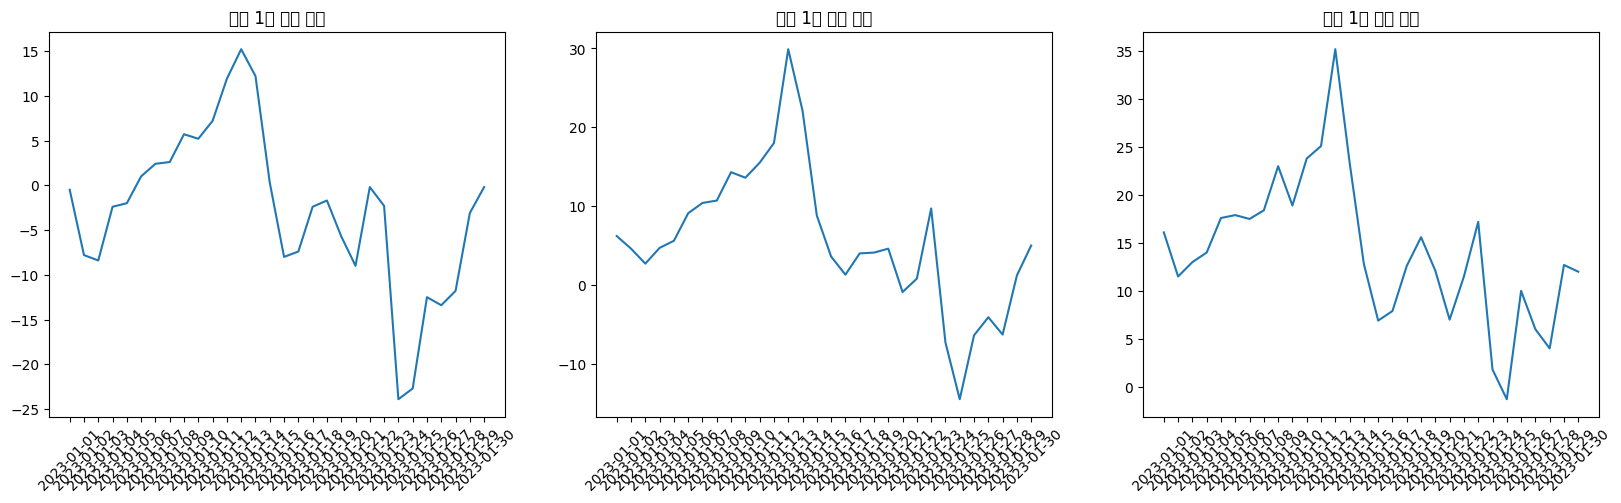

In [12]:
from matplotlib import pyplot as plt

def create_graph(city_list):
    plt.figure(figsize = (20, 5))

    
    data_list = [[seoul_date_list, seoul_list],
                [busan_date_list, busan_list],
                [jeju_date_list, jeju_list]]

    for cnt, data in enumerate(data_list):
        cnt+=1
        plt.subplot(1,3,cnt)
        plt.plot(data[0], data[1])
        plt.xticks(rotation=45)
        plt.title(city_list[cnt-1]+" "+"1월 기온 추이")
        
city_list = ['서울','부산','제주']        
create_graph(city_list)    